# Question 3.0

In [219]:
# all imports must be done here.

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [220]:
# reading he CSV file
df = pd.read_csv("./Data_Intern_Task.csv")

# creating the marketplace and country columns
marketplace_list, country_list = [], []
for i, val in df.pop("site").items():
    if isinstance(val, float):
        marketplace, country = np.nan, np.nan
    else:
        if "-" in val:
            marketplace, country = map(lambda x: x.strip(), val.split("-"))
        else:
            marketplace, country = map(lambda x: x.strip(), val.rsplit(" ", 1))

    marketplace_list.append(marketplace)
    country_list.append(country)

df["marketplace"] = marketplace_list
df["country"] = country_list
# droping the nan values inplace from the df DataFrame
df.dropna(inplace=True)
df

,date,sales,units_sold,unit_price,order_id,product id,marketplace,country
0,01/01/2019,77.50,1.0,94.55,41974.0,435.0,Amazon Seller Central,IT
1,01/01/2019,37.49,1.0,44.99,23027.0,64.0,Amazon Seller Central,UK
2,01/01/2019,16.66,1.0,19.99,21006.0,509.0,Amazon Seller Central,UK
3,01/01/2019,16.66,1.0,19.99,24456.0,509.0,Amazon Seller Central,UK
4,01/01/2019,16.66,1.0,19.99,23589.0,509.0,Amazon Seller Central,UK
...,...,...,...,...,...,...,...,...
49995,25/05/2019,24.99,1.0,29.99,23116.0,279.0,Amazon Seller Central,UK
49996,25/05/2019,24.99,1.0,29.99,26777.0,278.0,Amazon Seller Central,UK
49997,25/05/2019,24.99,1.0,29.99,31337.0,278.0,Amazon Seller Central,UK
49998,25/05/2019,24.99,1.0,29.99,26202.0,278.0,Amazon Seller Central,UK


In [221]:
# ordering the DataFrame on oder_id [No change in dataframe]
df = df.groupby(by=["order_id"], dropna=True, group_keys=False).apply(lambda x:x)
df["order_id"] = df["order_id"].astype(np.int64)
df

,date,sales,units_sold,unit_price,order_id,product id,marketplace,country
0,01/01/2019,77.50,1.0,94.55,41974,435.0,Amazon Seller Central,IT
1,01/01/2019,37.49,1.0,44.99,23027,64.0,Amazon Seller Central,UK
2,01/01/2019,16.66,1.0,19.99,21006,509.0,Amazon Seller Central,UK
3,01/01/2019,16.66,1.0,19.99,24456,509.0,Amazon Seller Central,UK
4,01/01/2019,16.66,1.0,19.99,23589,509.0,Amazon Seller Central,UK
...,...,...,...,...,...,...,...,...
49995,25/05/2019,24.99,1.0,29.99,23116,279.0,Amazon Seller Central,UK
49996,25/05/2019,24.99,1.0,29.99,26777,278.0,Amazon Seller Central,UK
49997,25/05/2019,24.99,1.0,29.99,31337,278.0,Amazon Seller Central,UK
49998,25/05/2019,24.99,1.0,29.99,26202,278.0,Amazon Seller Central,UK


In [222]:
# saperating the month and year and making new column

def year_month_seperator(date):
    '''
        takes complete date in dd/MM/YYYY format and returns 
        the month and year in integer format
    '''
    dt_obj = datetime.strptime(date, "%d/%m/%Y")
    return dt_obj.month, dt_obj.year
# take list of year and month in the year_lst and month_lst
year_lst, month_lst = [], []
for _, val in df.pop("date").items():
    month, year = year_month_seperator(val) # month, year
    year_lst.append(year)
    month_lst.append(month)

df["year"] = pd.Series(year_lst, dtype=np.int64)
df["month"] = pd.Series(month_lst)
# droping the nan values inplace from the df DataFrame
df.dropna(inplace=True)

df["year"] = df["year"].astype(np.int64)
df["month"] = df["month"].astype(np.int64)

# adding new column named selling price to the df
df["selling_price"] = df["unit_price"] * df["units_sold"]

# DataFrame with year and month
df

,sales,units_sold,unit_price,order_id,product id,marketplace,country,year,month,selling_price
0,77.50,1.0,94.55,41974,435.0,Amazon Seller Central,IT,2019,1,94.55
1,37.49,1.0,44.99,23027,64.0,Amazon Seller Central,UK,2019,1,44.99
2,16.66,1.0,19.99,21006,509.0,Amazon Seller Central,UK,2019,1,19.99
3,16.66,1.0,19.99,24456,509.0,Amazon Seller Central,UK,2019,1,19.99
4,16.66,1.0,19.99,23589,509.0,Amazon Seller Central,UK,2019,1,19.99
...,...,...,...,...,...,...,...,...,...,...
49986,233.33,1.0,279.99,21948,623.0,Amazon Seller Central,UK,2019,5,279.99
49987,29.16,1.0,34.99,18697,280.0,Amazon Seller Central,UK,2019,5,34.99
49988,58.33,1.0,69.99,2844,255.0,Amazon Seller Central,UK,2019,5,69.99
49989,24.99,1.0,29.99,37456,277.0,Amazon Seller Central,UK,2019,5,29.99


# Question 3.1

In [223]:
# grouping the df DataFrame with [year, month, day, marketplace, country] with observed key as True
df_observed_bool = df.groupby(by = ["year", "month", "marketplace", "country"], observed =  True)

# extracting the mean and average data from the bool object returned by grouping the df DataFrame
df_observed_count = df_observed_bool.mean()


In [224]:
# getting the counts of the requests 
count_series = df_observed_bool.count()["order_id"]

# arranging the ouput dataFrame
df_observed_count["number of orders"] = count_series
df_observed_count["total units sold"] = count_series
df_observed_count["average_item_per_order"] = df_observed_count["units_sold"].mean()
df_observed_count.rename(columns={"unit_price": "average order value", "selling_price": "average selling price"}, inplace=True)

# droping the useless Columns from the output DataFrame
df_observed_count = df_observed_count.drop(columns=["order_id"])
df_observed_count

sales  units_sold  \
year month marketplace           country                           
2019 1     Amazon Seller Central DE        42.438818    1.056650   
                                 ES       103.154302    1.046512   
                                 FR        63.398697    1.034574   
                                 IT        79.995033    1.071895   
                                 UK        36.969119    1.062305   
...                                              ...         ...   
     6     ManoMano              ES       249.220000    1.000000   
                                 IT        66.332500    1.250000   
                                 UK        15.400000    1.000000   
           eBay Fixed Price      UK        15.830000    1.000000   
           eBay Tiendas          ES        88.250000    1.000000   

                                          average order value  product id  \
year month marketplace           country                                    
2019 1     Amazon Seller Central DE                 48.301601  195.564039   
                                 ES                120.401163  248.313953   
                                 FR                 62.040133  310.281915   
                                 IT                 92.824902  276.607843   
                                 UK                 42.506326  345.341344   
...                                                       ...         ...   
     6     ManoMano              ES                301.560000   11.000000   
                                 IT                 68.735000  338.000000   
                                 UK                 18.490000  535.000000   
           eBay Fixed Price      UK                 18.990000  105.000000   
           eBay Tiendas          ES                106.790000  412.000000   

                                          average selling price  \
year month marketplace           country                          
2019 1     Amazon Seller Central DE                   50.502217   
                                 ES                  124.815930   
                                 FR                   63.398590   
                                 IT                   97.593856   
                                 UK                   44.360476   
...                                                         ...   
     6     ManoMano              ES                  301.560000   
                                 IT                   80.930000   
                                 UK                   18.490000   
           eBay Fixed Price      UK                   18.990000   
           eBay Tiendas          ES                  106.790000   

                                          number of orders  total units sold  \
year month marketplace           country                                       
2019 1     Amazon Seller Central DE                    406               406   
                                 ES                     86                86   
                                 FR                    376               376   
                                 IT                    153               153   
                                 UK                   4494              4494   
...                                                    ...               ...   
     6     ManoMano              ES                      1                 1   
                                 IT                      4                 4   
                                 UK                      2                 2   
           eBay Fixed Price      UK                      1                 1   
           eBay Tiendas          ES                      1                 1   

                                          average_item_per_order  
year month marketplace           country                          
2019 1     Amazon Seller Central DE                     1.104739  
                                 ES           

In [225]:
# description of the above classification in Question 3.1 of the data
df_observed_count.describe()

,sales,units_sold,average order value,product id,average selling price,number of orders,total units sold,average_item_per_order
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01
mean,64.395171,1.104739,70.526453,289.805214,74.970595,510.020408,510.020408,1.104739e+00
std,33.251828,0.224992,40.040624,95.883624,40.616777,1365.792553,1365.792553,2.231862e-16
min,6.660000,1.000000,7.990000,11.000000,7.990000,1.000000,1.000000,1.104739e+00
25%,46.086143,1.000000,48.524342,245.017447,54.128693,14.250000,14.250000,1.104739e+00
50%,58.032372,1.057983,63.290833,286.267248,65.808391,87.000000,87.000000,1.104739e+00
75%,77.909845,1.110479,84.626402,335.826463,90.591182,356.750000,356.750000,1.104739e+00
max,249.220000,2.888889,301.560000,665.000000,301.560000,7573.000000,7573.000000,1.104739e+00


# Question 3.2

In [226]:
df_observed_by_product_id_bool = df.groupby(by=["year", "month", "marketplace", "country","product id"], observed=True)

# getting the counts of the requests 
df_observed_by_product_id = df_observed_by_product_id_bool.mean(numeric_only=True)
count_series = df_observed_by_product_id_bool.count()["order_id"]

# arranging the ouput dataFrame
df_observed_by_product_id["number of orders"] = count_series
df_observed_by_product_id["total units sold"] = count_series
df_observed_by_product_id.rename(columns={"unit_price": "average order value", "selling_price": "average selling price"}, inplace=True)

# droping the useless Columns from the output DataFrame inplace = True
df_observed_by_product_id.drop(columns=["order_id"])
df_observed_by_product_id

sales  units_sold  \
year month marketplace           country product id                          
2019 1     Amazon Seller Central DE      26.0        27.610000    1.000000   
                                         44.0        41.342222    1.111111   
                                         45.0        37.405833    1.000000   
                                         46.0         7.340000    1.000000   
                                         47.0        10.460000    1.000000   
...                                                        ...         ...   
     6     ManoMano              IT      552.0       72.690000    1.000000   
                                 UK      356.0       21.650000    1.000000   
                                         714.0        9.150000    1.000000   
           eBay Fixed Price      UK      105.0       15.830000    1.000000   
           eBay Tiendas          ES      412.0       88.250000    1.000000   

                                                     average order value  \
year month marketplace           country product id                        
2019 1     Amazon Seller Central DE      26.0                  32.860000   
                                         44.0                  44.369444   
                                         45.0                  44.513333   
                                         46.0                   8.730000   
                                         47.0                  12.448571   
...                                                                  ...   
     6     ManoMano              IT      552.0                 88.690000   
                                 UK      356.0                 25.990000   
                                         714.0                 10.990000   
           eBay Fixed Price      UK      105.0                 18.990000   
           eBay Tiendas          ES      412.0                106.790000   

                                                         order_id  \
year month marketplace           country product id                 
2019 1     Amazon Seller Central DE      26.0        39818.000000   
                                         44.0        30581.277778   
                                         45.0        34388.666667   
                                         46.0        40961.000000   
                                         47.0        32697.500000   
...                                                           ...   
     6     ManoMano              IT      552.0       48788.000000   
                                 UK      356.0       48775.000000   
                                         714.0       48780.000000   
           eBay Fixed Price      UK      105.0        6592.000000   
           eBay Tiendas          ES      412.0       14794.000000   

                                                     average selling price  \
year month marketplace           country product id                          
2019 1     Amazon Seller Central DE      26.0                    32.860000   
                                         44.0                    49.196111   
                                         45.0                    44.513333   
                                         46.0                     8.730000   
                                         47.0                    12.448571   
...                                                                    ...   
     6     ManoMano              IT      552.0                   88.690000   
                                 UK      356.0                   25.990000   
                                         714.0                   10.990000   
           eBay Fixed Price      UK      105.0                   18.990000   
           eBay Tiendas          ES      412.0                  106.790000   

                                                     number of orders  \
year month marketplace           country product id                

In [227]:
# description of the above classification in Question 3.2 of the data
df_observed_by_product_id.describe()

,sales,units_sold,average order value,order_id,average selling price,number of orders,total units sold
count,7908.000000,7908.000000,7908.000000,7908.000000,7908.000000,7908.000000,7908.000000
mean,66.517785,1.102533,72.490341,27131.192985,77.864938,6.320435,6.320435
std,92.376333,0.436859,100.528857,15068.322865,108.518134,13.000336,13.000336
min,2.080000,1.000000,2.490000,19.000000,2.490000,1.000000,1.000000
25%,21.384333,1.000000,24.499688,12238.900000,24.990000,1.000000,1.000000
50%,39.690000,1.000000,43.700000,24735.250000,45.831667,2.000000,2.000000
75%,74.990000,1.000000,80.030000,42954.337500,86.900000,6.000000,6.000000
max,1666.636667,10.666667,1550.000000,48791.500000,1999.966667,304.000000,304.000000


# Question 3.3

In [228]:
# sns theme
sns.set_theme({"axes.facecolor": "b", "axes.edgecolor": "C0"})

# Visualization of the DataFrame generated in Question 3.1
data_query = df_observed_by_product_id.query("country == 'UK' & marketplace == 'Amazon Seller Central'")

<AxesSubplot: xlabel='month', ylabel='sales'>

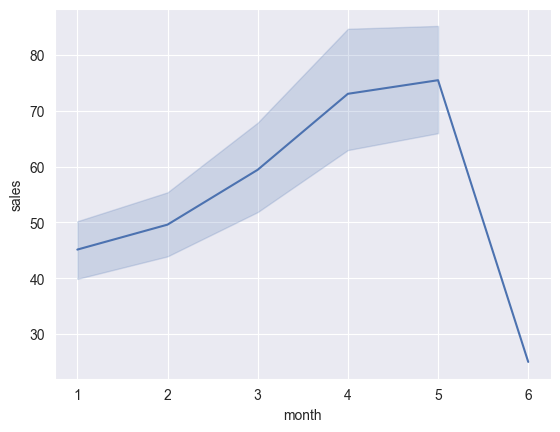

In [229]:
# visualizations of sales per month
sns.lineplot(data_query, x="month", y="sales")

<AxesSubplot: xlabel='month', ylabel='average selling price'>

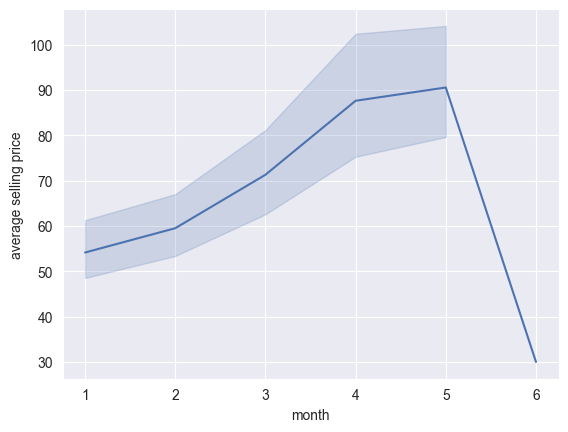

In [230]:
# visualizations of the average selling price per month
sns.lineplot(data_query, x="month", y="average selling price")

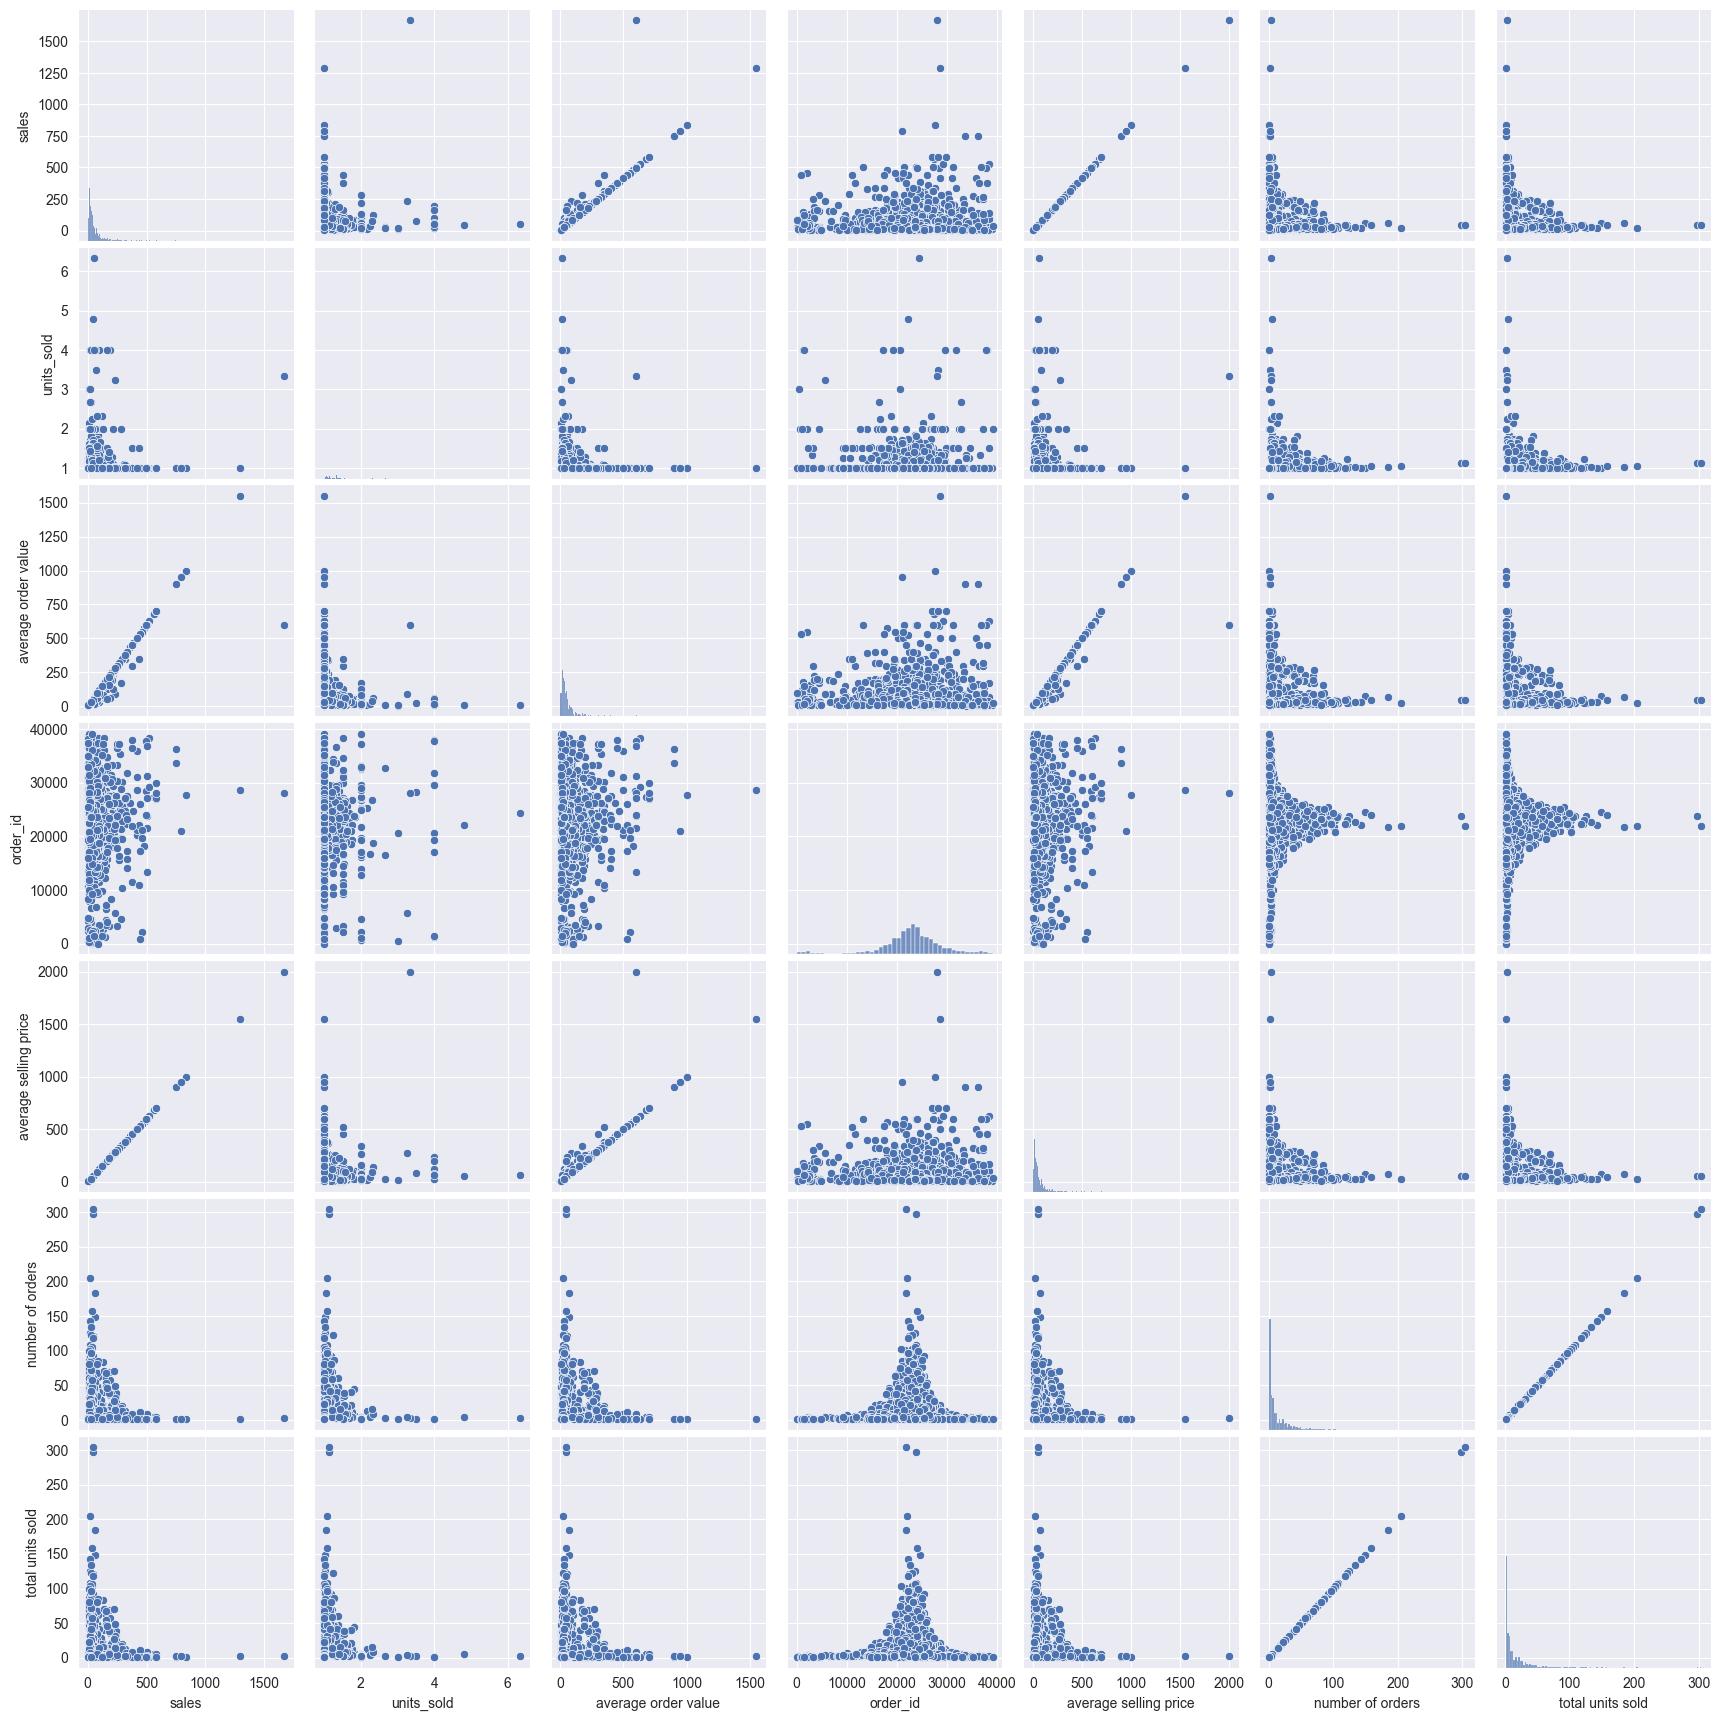

In [231]:
# looking a pair plot on all the possible combinations of the visualizations
sns.pairplot(data_query)

# Question 3.4

<AxesSubplot: xlabel='month', ylabel='average selling price'>

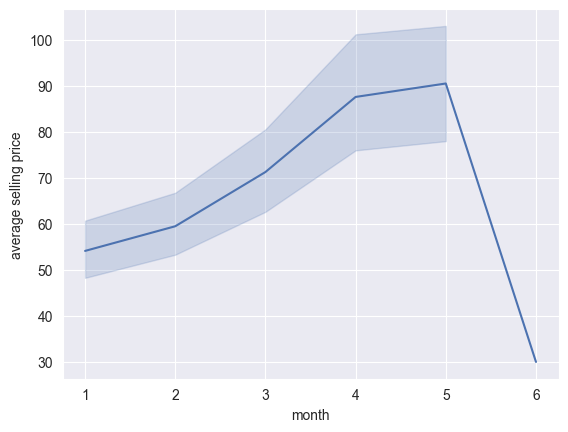

In [232]:
# visualizations of Amazon Marketplaces on DataFrame in Question 3.2
sns.lineplot(data_query, x="month", y="average selling price")

<AxesSubplot: xlabel='month', ylabel='sales'>

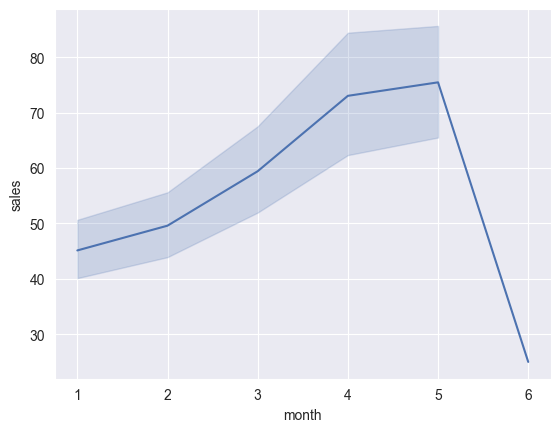

In [233]:
# visualizations of sales/month
sns.lineplot(data_query, x="month", y="sales")

<AxesSubplot: xlabel='month', ylabel='sales'>

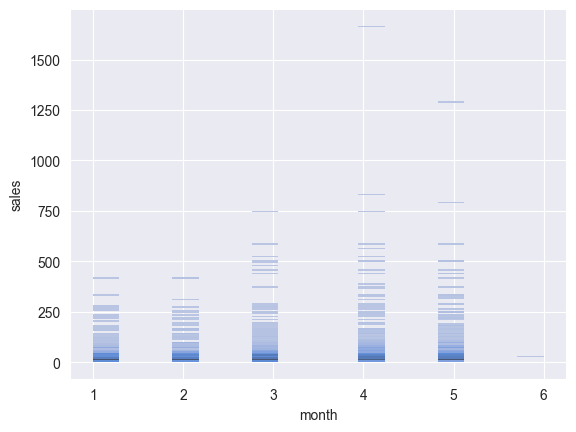

In [234]:
# histplot for sales per month
sns.histplot(data_query, x="month", y="sales")

<AxesSubplot: xlabel='month', ylabel='average selling price'>

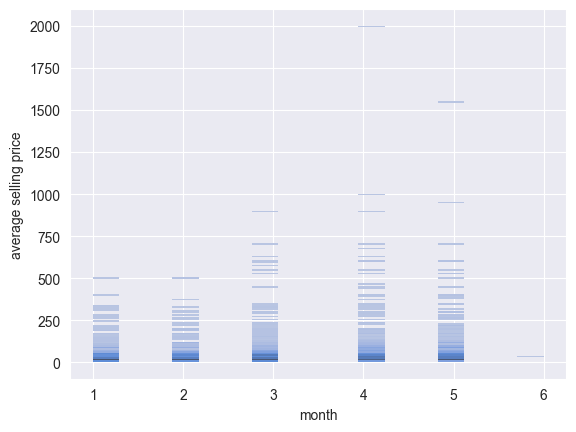

In [235]:
# histplot for average selling price per month
sns.histplot(data_query, x="month", y="average selling price")